In [150]:
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
from os import listdir
from os.path import isfile, join
from os import walk
import matplotlib.pyplot as plt

In [117]:
def getJsonPaths(path):
    json_files = []
#     print(path)
    for (dirpath, dirnames, filenames) in walk(path):
        json_files.extend(filenames)
        break
    return json_files

def getDirPath(path):
    dir_files = []
#     print(path)
    for (dirpath, dirnames, filenames) in walk(path):
        dir_files.extend(dirnames)
        break
        
    #print(dir_files)
    return dir_files

In [118]:
getJsonPaths(matches_path+'72')

['30.json']

There are 799 matches total in this dataset
2018/2019    141
2018         101
2019/2020     87
2019          52
2014/2015     38
2011/2012     37
2017/2018     36
2009/2010     35
2016/2017     34
2010/2011     33
2015/2016     33
2012/2013     32
2013/2014     31
2008/2009     31
2007/2008     28
2006/2007     26
2005/2006     17
2004/2005      7
Name: season_year, dtype: int64


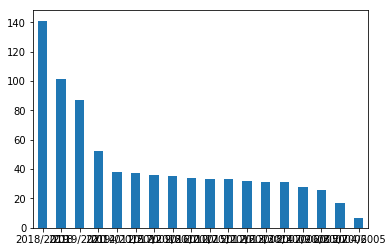

In [241]:
# Get json files
data_dir = "open-data-master/data"
events_json = getJsonPaths(data_dir+'/events')
lineups_json = getJsonPaths(data_dir+'/lineups')

matches_path = "open-data-master/data/matches/"

matches_dirs = getDirPath(matches_path)

matches_json = []
df_matches = pd.DataFrame()
total_matches = 0 
dates = []
for m_dir in matches_dirs:
    matches_json = getJsonPaths(matches_path+str(m_dir))
    count = 0
    
    for file in matches_json:
        #print(matches_path+str(m_dir)+'/'+file)
        new_df = pd.read_json(matches_path+str(m_dir)+'/'+file)
        df_matches = pd.concat([df_matches,new_df])
        dates += list(new_df['match_date'].values)
        total_matches +=  new_df.shape[0]
        count+=1

    #print(matches_path+str(m_dir)+' had '+str(count)+' json files')
print('There are '+str(total_matches)+' matches total in this dataset')

# Create dates into datetime objects
df_matches['match_date'] = pd.to_datetime(df_matches['match_date'])
df_matches['month'] = df_matches.apply(lambda row: row.match_date.month, axis = 1)
df_matches['year'] = df_matches.apply(lambda row: row.match_date.year, axis = 1)
season = []
for idx,row in df_matches.iterrows():
    season += [row.season['season_name']]
df_matches['season_year'] =season
x = df_matches['season_year'].value_counts()


ax = x.plot.bar(rot=0) # disgusting plot
print(x)

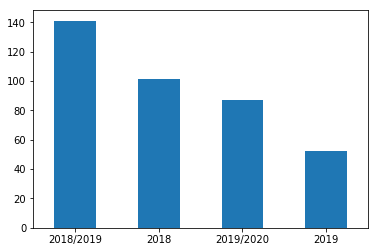

In [240]:
df_mini = df_matches[(df_matches['season_year']== '2018/2019') |
                     (df_matches['season_year']== '2018') | 
                     (df_matches['season_year']== '2019/2020')|
                     (df_matches['season_year']== '2019')]
df_mini['season_year'].value_counts()
x_mini = df_mini['season_year'].value_counts()
ax_mini = x_mini.plot.bar(rot=0) # disgusting plot


In [242]:
df_mini.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee,month,year,season_year
0,16215,2019-03-17,20:45:00.000,"{'competition_id': 11, 'country_name': 'Spain'...","{'season_id': 4, 'season_name': '2018/2019'}","{'home_team_id': 218, 'home_team_name': 'Real ...","{'away_team_id': 217, 'away_team_name': 'Barce...",1,4,available,2019-12-16T23:09:16.168756,"{'data_version': '1.1.0', 'shot_fidelity_versi...",28,"{'id': 1, 'name': 'Regular Season'}","{'id': 352, 'name': 'Estadio Benito Villamarín...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun...",3,2019,2018/2019
1,16196,2019-03-02,20:45:00.000,"{'competition_id': 11, 'country_name': 'Spain'...","{'season_id': 4, 'season_name': '2018/2019'}","{'home_team_id': 220, 'home_team_name': 'Real ...","{'away_team_id': 217, 'away_team_name': 'Barce...",0,1,available,2019-12-16T23:09:16.168756,"{'data_version': '1.1.0', 'shot_fidelity_versi...",26,"{'id': 1, 'name': 'Regular Season'}","{'id': 353, 'name': 'Estadio Santiago Bernabéu...","{'id': 221, 'name': 'Alberto Undiano', 'countr...",3,2019,2018/2019
2,16205,2019-03-09,18:30:00.000,"{'competition_id': 11, 'country_name': 'Spain'...","{'season_id': 4, 'season_name': '2018/2019'}","{'home_team_id': 217, 'home_team_name': 'Barce...","{'away_team_id': 360, 'away_team_name': 'Rayo ...",3,1,available,2019-12-16T23:09:16.168756,"{'data_version': '1.1.0', 'shot_fidelity_versi...",27,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 209, 'name': 'Mario Melero', 'country':...",3,2019,2018/2019
3,16131,2019-01-13,18:30:00.000,"{'competition_id': 11, 'country_name': 'Spain'...","{'season_id': 4, 'season_name': '2018/2019'}","{'home_team_id': 217, 'home_team_name': 'Barce...","{'away_team_id': 322, 'away_team_name': 'Eibar...",3,0,available,2019-12-16T23:09:16.168756,"{'data_version': '1.0.3', 'shot_fidelity_versi...",19,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 183, 'name': 'Jesús Gil', 'country': {'...",1,2019,2018/2019
4,16149,2019-01-27,16:15:00.000,"{'competition_id': 11, 'country_name': 'Spain'...","{'season_id': 4, 'season_name': '2018/2019'}","{'home_team_id': 211, 'home_team_name': 'Giron...","{'away_team_id': 217, 'away_team_name': 'Barce...",0,2,available,2019-12-16T23:09:16.168756,"{'data_version': '1.0.3', 'shot_fidelity_versi...",21,"{'id': 1, 'name': 'Regular Season'}","{'id': 343, 'name': 'Estadi Municipal de Monti...","{'id': 219, 'name': 'Pablo González', 'country...",1,2019,2018/2019


In [244]:

#df_matches = pd.read_json(matches_path+'/'+matches_json[0])

df_event = pd.read_json(data_dir+"/events/"+events_json[0])
df_lineups = pd.read_json(data_dir+"/lineups/"+lineups_json[1])


df_event

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,goalkeeper,shot,interception,50_50,block,ball_recovery,miscontrol,foul_won,off_camera,substitution
0,d19cf866-c033-410f-9b8b-d614947d247d,1,1,2020-04-09 00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 974, 'name': 'Reading WFC'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3fb1fb75-3309-48cc-861b-97c9ef98dbad,2,1,2020-04-09 00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 974, 'name': 'Reading WFC'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9450aa6d-fba9-4793-b4f6-4b9812e1ee93,3,1,2020-04-09 00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 974, 'name': 'Reading WFC'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00fca509-4aa3-439a-834b-3356b0b93fe5,4,1,2020-04-09 00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 974, 'name': 'Reading WFC'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a15a0a6e-4e23-4491-9881-3111f3eab05c,5,1,2020-04-09 00:00:00.443,0,0,"{'id': 30, 'name': 'Pass'}",2,"{'id': 969, 'name': 'Birmingham City WFC'}","{'id': 9, 'name': 'From Kick Off'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,634d563b-86c0-4d9c-8719-a28df054beb8,3556,2,2020-04-09 00:49:04.031,94,4,"{'id': 30, 'name': 'Pass'}",253,"{'id': 969, 'name': 'Birmingham City WFC'}","{'id': 4, 'name': 'From Throw In'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3556,03a4b1c0-0b1c-498c-aa37-9464e00abcb4,3557,2,2020-04-09 00:49:06.070,94,6,"{'id': 42, 'name': 'Ball Receipt*'}",253,"{'id': 969, 'name': 'Birmingham City WFC'}","{'id': 4, 'name': 'From Throw In'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3557,617686e8-c9b6-4507-96e7-b6c89fbeff27,3558,2,2020-04-09 00:49:06.070,94,6,"{'id': 9, 'name': 'Clearance'}",253,"{'id': 969, 'name': 'Birmingham City WFC'}","{'id': 4, 'name': 'From Throw In'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3558,014d0b31-1a3a-4736-988e-01b5915e0fde,3559,2,2020-04-09 00:49:06.712,94,6,"{'id': 34, 'name': 'Half End'}",253,"{'id': 969, 'name': 'Birmingham City WFC'}","{'id': 4, 'name': 'From Throw In'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
